# **Third Project - DL**

*Shir Sharoni, Itamar Avieli, Omer Abraham, Mor Baruch*

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

**Let**'s load the data:

In [ ]:
train_df = pd.read_csv('https://github.com/odedovadia/AdvancedMLDLCourse/blob/main/Assignments/Assignment%20III/train.csv?raw=true')
test_df = pd.read_csv('https://github.com/odedovadia/AdvancedMLDLCourse/blob/main/Assignments/Assignment%20III/test.csv?raw=true')

# **Exploring the Data**

In [ ]:
# shapes 
print('train :',train_df.shape)
print('test :',test_df.shape)

train : (70405, 5)
test : (4245, 5)


In [ ]:
# columns names
train_df.columns

Index(['Dialogue', 'Character', 'Episode', 'Show', 'Dialogue_length'], dtype='object')

As we can see, in the data there is about 70K records of Dialogues (lines) from the two shows

In [ ]:
#glimps to the data 
train_df

,Dialogue,Character,Episode,Show,Dialogue_length
0,Hey.,joey,Season-07 Episode-13-The One Where Rosita Dies,Friends,1
1,(to Joey) Are you gonna be embarrassed going ...,phoebe,Season-10 Episode-04-The One With The Cake,Friends,13
2,"Me? No no no, you. You're gonna tell him. I'm ...",elaine,S03E22,Seinfeld,14
3,Alright you guys are off to party number one ...,chandler,Season-02 Episode-22-The One With the Two Parties,Friends,56
4,Am I? Or am I so sane that you just blew your ...,kramer,S05E12,Seinfeld,13
...,...,...,...,...,...
70400,Pretty much.,jerry,S05E09,Seinfeld,2
70401,"Oh, well um, not right now. Y'know I’m just g...",phoebe,Season-03 Episode-05-The One With Frank Jr.,Friends,22
70402,"Ooh, I think I wanna trade circles.",phoebe,Season-07 Episode-22-The One With Chandler’s Dad,Friends,7
70403,"Hey, hey, what is this? What's going on here?",jerry,S05E03,Seinfeld,9


We will only take the Dialogue (the lines) and the label - Show

In [ ]:
x_train = train_df['Dialogue']
y_train = train_df['Show']
x_test = test_df['Dialogue']
y_test = test_df['Show']


## Data preprocessing


### Cleaning the data

Let's begin by cleaning the text and removing any Square Brackets (HTML leftovers):


In [ ]:
# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing the noisy text
def clean_text(text):
    text = remove_between_square_brackets(text)
    return text

# Apply function on Dialogue column
x_train = x_train.apply(clean_text)
x_test = x_test.apply(clean_text)

We decided not to remove special charachters because it weakens the results

In [ ]:
# # Define function for removing special characters
# def remove_special_characters(text):
#     pattern = r'[^a-zA-Z0-9\s]'
#     text = re.sub(pattern,'',text)
#     return text

# # Apply function
# x_train = x_train.apply(remove_special_characters)
# x_test = x_test.apply(remove_special_characters)

Let's take a look of the stop words:

In [ ]:
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
print('Number of English stop words:', len(stopword_list))
print(stopword_list[:5])

Number of English stop words: 179
['i', 'me', 'my', 'myself', 'we']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Tokeniztion

In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()

In [ ]:
tokenizer.tokenize(x_train.iloc[1])

['(',
 'to',
 'Joey',
 ')',
 'Are',
 'you',
 'gonna',
 'be',
 'embarrassed',
 'going',
 'up',
 'there',
 'having',
 'nothing',
 'prepared',
 '?']

After removing the stop words we saw that our accuarecy weakens therefore we deciced not to remove any stop words

In [ ]:
# Removing the stopwords
# from tqdm.notebook import tqdm
# tqdm.pandas()

# def remove_stopwords(text, is_lower_case=False):
#     tokens = tokenizer.tokenize(text)
#     tokens = [token.strip() for token in tokens]
#     if is_lower_case:
#         filtered_tokens = [token for token in tokens if token not in stopword_list]
#     else:
#         filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
#     filtered_text = ' '.join(filtered_tokens)    
#     return filtered_text

# # Apply function on review column
# x_train = x_train.progress_apply(remove_stopwords)

# x_test = x_test.progress_apply(remove_stopwords)

In [ ]:
# # Stemming the text
# def simple_stemmer(text):
#     ps = nltk.porter.PorterStemmer()
#     stemmed_words_list = []
#     text = ' '.join([ps.stem(word) for word in text.split()])
#     return text
# # Apply function on review column
# x_train = x_train.progress_apply(simple_stemmer)

# x_test = x_test.progress_apply(simple_stemmer)

# Train-test-valdiation split

As usual, let's do a train-test-validation split:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

We can also check that the distribution of our labels between test and train is not skewed toward one class:

In [ ]:
train_label_count = y_train.value_counts()
test_label_count = y_val.value_counts()

print('Train Friends to Seinfeld ratio:', train_label_count['Friends'] / train_label_count['Seinfeld']) 
print('Test Friends to Seinfeld ratio:', test_label_count['Friends'] / test_label_count['Seinfeld']) 

Train Friends to Seinfeld ratio: 1.2501697894610684
Test Friends to Seinfeld ratio: 1.2414836039477872


Converting our lables "Shows" outputs to '0' and '1'

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_val = lb.transform(y_val)
y_test = lb.transform(y_test)


## Building a DL model




In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Conv1D, Flatten, Dense, Embedding
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer 
from keras.utils import pad_sequences

We're going to use Keras' tokenizer:

In [ ]:
token = Tokenizer(lower=False)
token.fit_on_texts(x_train)

Convert to sequences:

In [ ]:
x_train_dl = token.texts_to_sequences(x_train)
x_val_dl = token.texts_to_sequences(x_val)
x_test_dl = token.texts_to_sequences(x_test)

Calculate document lengths:

In [ ]:
doc_len_list = [len(doc) for doc in x_train_dl]

Longest, shortest, and average line:

In [ ]:
max(doc_len_list), min(doc_len_list), np.mean(doc_len_list)

(374, 0, 11.055322775371067)

Let's examine the distribution:


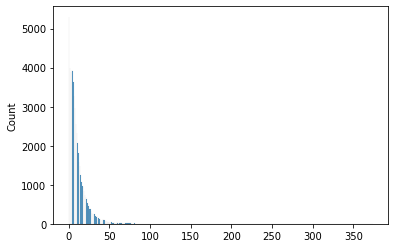

In [ ]:
sns.histplot(doc_len_list)

### Remove empty arrays

In [ ]:
# x_train_dl = [lst for lst in x_train_dl if len(lst) > 0]
empty_indexs = [idx for idx, lst in enumerate(x_train_dl) if len(lst) <= 0]
print(empty_indexs)

[5763, 8086, 10435, 22106, 24796, 36462, 42508]


In [ ]:
print(len(doc_len_list))
print(len(empty_indexs))
x_train_dl = [lst for idx, lst in enumerate(x_train_dl) if idx not in empty_indexs]
y_train = [ele for idx, ele in enumerate(y_train) if idx not in empty_indexs]
# return y_train to np.array
y_train = np.array(y_train)

56324
7


In [ ]:
doc_len_list = [len(doc) for doc in x_train_dl]

In [ ]:
max(doc_len_list), min(doc_len_list), np.mean(doc_len_list)

(374, 1, 11.05669691212245)

We want to make sure that all sequences have the same length. According to the distribution, 50 seems like a reasonable shared value:

In [ ]:
max_words = 50

x_train_dl = pad_sequences(x_train_dl, maxlen=max_words)
x_val_dl = pad_sequences(x_val_dl, maxlen=max_words)
x_test_dl = pad_sequences(x_test_dl, maxlen=max_words)

In [ ]:
total_words = len(token.word_index) + 1 
total_words

24778

### Embeddings

Let's build the architecture:

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=32, input_length=max_words))
model.add(Conv1D(8, 3, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 32)            792896    
                                                                 
 conv1d_2 (Conv1D)           (None, 50, 8)             776       
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                25664     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 819,401
Trainable params: 819,401
Non-tr

In [ ]:
model.fit(x_train_dl, y_train, validation_data=(x_val_dl, y_val), epochs=5, batch_size=64)

Epoch 1/5
880/880 [==============================] - 5s 5ms/step - loss: 0.5174 - accuracy: 0.7101 - val_loss: 0.4334 - val_accuracy: 0.7695
Epoch 2/5
880/880 [==============================] - 4s 5ms/step - loss: 0.3754 - accuracy: 0.8148 - val_loss: 0.4272 - val_accuracy: 0.7748
Epoch 3/5
880/880 [==============================] - 4s 4ms/step - loss: 0.3105 - accuracy: 0.8491 - val_loss: 0.4540 - val_accuracy: 0.7715
Epoch 4/5
880/880 [==============================] - 4s 5ms/step - loss: 0.2647 - accuracy: 0.8703 - val_loss: 0.4945 - val_accuracy: 0.7690
Epoch 5/5
880/880 [==============================] - 4s 5ms/step - loss: 0.2307 - accuracy: 0.8892 - val_loss: 0.5578 - val_accuracy: 0.7672


Let's evaluate our model:

In [ ]:
model.evaluate(x_test_dl, y_test)

133/133 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.8629


[0.47290706634521484, 0.862897515296936]

# 2nd Part 
 Check how the evaluation change when looking at each character sepeartely


In [ ]:
x_test_new = test_df[['Dialogue', 'Character']]
y_test_new = test_df[['Show','Character']]

In [ ]:
characters = x_test_new['Character'].unique()
characters

array(['joey', 'monica', 'george', 'kramer', 'rachel', 'ross', 'phoebe',
       'jerry', 'chandler', 'elaine'], dtype=object)

Update for each character the Test set as we did in part A

In [ ]:
def characters_df(characters,x_test_dl,y_test_new): 
    df_dict = {}
    for name in characters:
        df_dict[name] = [x_test_new[x_test_new['Character'] == name]['Dialogue'],y_test_new[y_test_new['Character'] == name]['Show']]

    for name in df_dict:
      df_dict[name][0] = df_dict[name][0].apply(clean_text)
      df_dict[name][0] = token.texts_to_sequences(df_dict[name][0])
      df_dict[name][0] = pad_sequences(df_dict[name][0], maxlen=max_words)
      df_dict[name][1] = lb.transform(df_dict[name][1])

    
    return df_dict

In [ ]:
def evaluate_characters(df_dict, model):
  df_evaluate = {}
  for k in df_dict.keys():
    df_evaluate[k] = model.evaluate(df_dict[k][0],df_dict[k][1])[1]
  return df_evaluate

In [ ]:
df_evaluate = evaluate_characters(df_dict, model)

10/10 [==============================] - 0s 3ms/step - loss: 0.8336 - accuracy: 0.7740


In [ ]:
for name in df_evaluate:
  print(name, df_evaluate[name])


joey 0.8771186470985413
monica 0.8952879309654236
george 0.8248944878578186
kramer 0.8277027010917664
rachel 0.8787878751754761
ross 0.8736842274665833
phoebe 0.9162436723709106
jerry 0.8603066205978394
chandler 0.871046245098114
elaine 0.7739726305007935


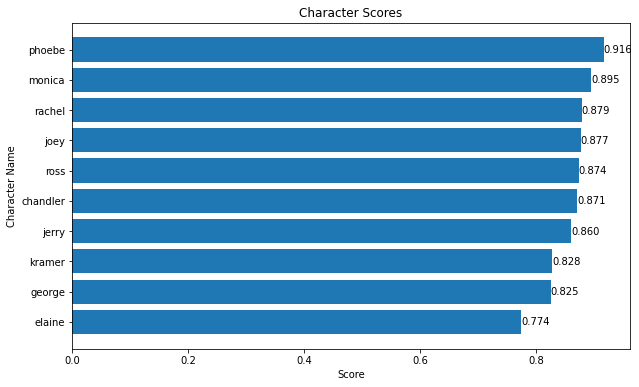

In [ ]:
import matplotlib.pyplot as plt

# Dictionary with character names as keys and scores as values
df_evaluate

# Extract the character names and scores from the dictionary
# Sort the scores in descending order
sorted_scores = sorted(df_evaluate.items(), key=lambda x: x[1], reverse=False)

# Extract the character names and scores from the sorted dictionary
names = [item[0] for item in sorted_scores]
values = [item[1] for item in sorted_scores]

plt.figure(figsize=(10, 6))

# Plot the bar chart
plt.barh(names, values)

for i, value in enumerate(values):
    plt.text(value, i, f'{value:.3f}', va='center', ha='left')

# Add a title and labels for the x and y axes
plt.title('Character Scores')
plt.xlabel('Score')
plt.ylabel('Character Name')

# Display the bar chart
plt.show()

### Results:
As we can see above, when looking at different characters during the prediction we see that there are characters where the model works better for them and vice versa.

In [ ]:
results = {
           'Test score (Accuracy)': [0.8629],
           'Train score (Accuracy)': [0.8892],
           'Number of trainable parameters': ['819,401'],
           'Number of layers': [6],
           'Regularization methods': ['Dropout'],
           'Number of epochs': [5],
           'Loss function': ['binary_crossentropy'],
           'Optimizer': ['adam'],
           'Embedding dimension' : [32]
           }
df = pd.DataFrame(results)
import os
df.to_csv(os.path.join(os.getcwd(), 'exercise3.csv'))